# Data Information:


## Input variables:

### Background Data:
1 - bu : League or Tournament the match took place in (categorical)

2 - year : Year the match took place in (numerical)

3 - Season : Spring or Summer depending on which half of the year the match took place in  (categorical: 'Spring', 'Summer',)

4 - Type:(categorical: 'Season', 'Playoffs',' Regional', or 'International match')

5 - Address: website address the data is scraped from

### Game Data(only some of them are shown here):

#### Every feature that starts with 'b' or 'blue' has its corresponding feature in 'r' or 'red'. 'blue' and 'red' refer to the two team in a single match

6 - blueTeamTag: Blue Team's tag name (ex. Team SoloMid is TSM)

7 - redTeamTag:	Red Team's Tag Name (ex. Team SoloMid is TSM)

8 - gamelength:	Game length in minutes

9 - golddiff:	Gold difference - computed Blue minus Red - by minute

10 - goldblue:	Blue Team's total gold value by minute

11 - bKills: List of Blue Team's kills - [Time in minutes, Victim, Killer, Assist1, Assist2, Assist3, Assist4, x_pos, y_pos]

12 - bTowers:	List of minutes that Blue Team destroyed a tower and Tower Location

13 - bInhibs:	List of minutes that Blue Team destroyed an inhibitor and Location

14 - bDragons:	List of minutes that Blue Team killed a dragon Dragon Type

15 - bBarons: List of minutes that Blue Team killed a baron nashor

16 - bHeralds:	List of minutes that Blue Team killed a rift herald

17 - goldred:	Red Team's total gold value by minute

18 - blueTop:	Name of Blue Team's player in the top position

19 - blueTopChamp:	Name of Blue Team's champion in the top position

20 - goldblueTop:	Blue's Top position player's gold value by minute

21 - blueBans:	List of champions Blue Team banned (in order)

## Output variable (desired target):

22 - y ( bResult ): Result of the match for Blue Team - 1 is a win, 0 is a loss

# Data preprocessing 

### Import libraries and data


In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

lol_origin = pd.read_csv('./leagueoflegends/leagueoflegends.csv')
lol = lol_origin.copy()
lol.tail()

,bu,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
7615,TCL,2018,Spring,Season,YC,0,1,SUP,34,"[0, 0, -18, -95, 45, -87, -117, 199, 126, 92, ...",...,Veigar,"[500, 500, 632, 982, 1258, 1667, 2060, 2390, 2...",Zeitnot,Xayah,"[500, 500, 564, 1027, 1320, 1727, 1963, 2276, ...",SnowFlower,Rakan,"[500, 500, 566, 801, 1004, 1234, 1463, 1674, 1...","['Ornn', 'Kalista', 'Ryze', 'Alistar', 'Shen']",https://matchhistory.euw.leagueoflegends.com/e...
7616,TCL,2018,Spring,Season,GAL,0,1,DP,39,"[0, 0, -86, -39, -207, -349, -60, -140, 187, -...",...,Ryze,"[500, 500, 612, 1000, 1193, 1626, 1979, 2318, ...",Ruvelius,Caitlyn,"[500, 500, 621, 977, 1420, 1809, 2047, 2413, 2...",Japone,Braum,"[500, 500, 587, 790, 1107, 1335, 1472, 1616, 1...","['Zoe', 'KogMaw', 'JarvanIV', 'Ornn', 'Rengar']",https://matchhistory.euw.leagueoflegends.com/e...
7617,OPL,2018,Spring,Season,SIN,0,1,DW,24,"[0, -8, -6, 116, 103, -92, -470, -958, -1998, ...",...,Malzahar,"[500, 500, 615, 903, 1225, 1617, 1976, 2304, 2...",k1ng,Ezreal,"[500, 508, 592, 986, 1400, 1753, 2196, 2538, 3...",Cupcake,Taric,"[500, 500, 585, 770, 976, 1222, 1446, 1627, 19...","['Azir', 'Kalista', 'Braum', 'Maokai', 'Alistar']",https://matchhistory.na.leagueoflegends.com/en...
7618,OPL,2018,Spring,Season,LGC,1,0,TTC,35,"[0, 0, -97, 33, 351, 284, 299, 263, 403, 623, ...",...,Veigar,"[500, 500, 561, 931, 1223, 1631, 1987, 2315, 2...",Low,Sivir,"[500, 500, 634, 930, 1304, 1691, 2042, 2384, 2...",Tilting,Janna,"[500, 500, 592, 788, 1006, 1251, 1490, 1704, 1...","['Kalista', 'Galio', 'Gnar', 'Jayce', 'Sejuani']",https://matchhistory.na.leagueoflegends.com/en...
7619,OPL,2018,Spring,Season,TTC,0,1,LGC,42,"[0, 0, -8, -225, -36, 73, 464, 184, 1171, 1409...",...,Malzahar,"[500, 500, 598, 968, 1165, 1477, 1801, 2016, 2...",Raid,Vayne,"[500, 500, 587, 954, 1327, 1749, 2007, 2471, 2...",Decoy,Braum,"[500, 500, 585, 793, 998, 1201, 1373, 1619, 18...","['KogMaw', 'Illaoi', 'Azir', 'Karma', 'Sejuani']",https://matchhistory.na.leagueoflegends.com/en...


### Data Dropping and Data Extraction.

First, we need to **drop some data**. The reasons are as follow:

1. Some data are **unrelated** to our goal, such as 'Address',which is only a website address.


2. Some data are **unavailable** at 15 minutes after the game begins, such as 'gamelength', which refers to the time span of the whole game. Also, 'bBarons(rBarons)' involves a neutral unit that appears in the game 20 minutes after it begins.


3. Some data are just **replaced**, such as 'goldblue', 'golddiff'. The former one is the total gold of the blue team, thus it is the sum of the gold in different position (i.e. Top, Middle, Jungle, ADC, Support). I drop it in order to advoid Perfect Collinearity. Similarly, 'golddiff' is just the difference of the gold of the two teams.

After that, if I treat 'player' as ordinal variables and transform them into dummies, I will also drop the original features 

that indicate their names.

 Also, data at 15 minutes are extracted from lists of minute data for some features.

In [2]:
#lol = lol_origin.drop(['golddiff','goldblue','goldred','Address','bBarons','rBarons','redBans','blueBans','gamelength'],1) 
#this is the way we treat 'player' as nominal variables

lol = lol_origin.drop(['golddiff','goldblue','goldred','Address','bBarons','rBarons','redBans','blueBans','blueTop','blueMiddle','blueJungle','blueADC','blueSupport',
          'redTop','redMiddle','redJungle','redADC','redSupport','gamelength'],1) 
# this is the way we treat 'player' as ordinal variables, therefore, we set them as dummies later

for x in ['goldblueTop','goldblueJungle','goldblueMiddle','goldblueADC','goldblueSupport',
          'goldredTop','goldredJungle','goldredMiddle','goldredADC','goldredSupport']:
    lol[x] = [int(y.split(',')[14]) for y in lol_origin[x]]

for x in ['Top','Jungle','Middle','ADC','Support']:
    lol['golddiff' + x ] = lol['goldblue' + x ] - lol['goldred' + x ]
    del lol['goldblue' + x ]
    del lol['goldred' + x ]

For more complicated cases such as 'bKills' below, a function was used to extract the accummulated data at 15 minutes.

In [3]:
lol['bKills'].values[1]

"[[11.104, 'DIG Shiphtur', 'CST Jesiz', ['CST Impaler'], 9294, 8716], [12.332, 'DIG Crumbzz', 'CST Cris', ['CST Sheep'], 9601, 5282], [12.392, 'DIG CoreJJ', 'CST Cris', ['CST Impaler', 'CST Mash'], 9967, 6811], [12.665, 'DIG Gamsu', 'CST Cris', ['CST Impaler', 'CST Mash', 'CST Sheep'], 10870, 5390], [14.837, 'DIG Crumbzz', 'CST Mash', ['CST Sheep'], 8556, 2686], [25.008, 'DIG KiWiKiD', 'CST Jesiz', ['CST Cris', 'CST Impaler', 'CST Mash', 'CST Sheep'], 9648, 6310], [25.134, 'DIG CoreJJ', 'CST Mash', ['CST Cris', 'CST Impaler', 'CST Jesiz', 'CST Sheep'], 9646, 6344], [28.412, 'DIG Crumbzz', 'CST Jesiz', ['CST Impaler', 'CST Mash', 'CST Sheep'], 8786, 8643], [30.128, 'DIG CoreJJ', 'CST Impaler', ['CST Cris', 'CST Mash'], 4790, 4742], [32.367, 'DIG KiWiKiD', 'CST Jesiz', ['CST Impaler', 'CST Sheep'], 10142, 7246]]"

In [4]:
def get_data15(feature):
    info = [x[2:-2] for x in feature]
    data15 = []
    for y in info:
        y = y.split('], [')
        j = 0
        for z in y:
            if z.strip() =='':
                break
            else:
                z=z.split(',')
                n =float(z[0])
                if n < 15.0 :
                    j = j + 1
        data15.append(j)
    return data15

In [5]:
for x in ['bKills','bTowers','bInhibs','bDragons','bHeralds',
          'rKills','rTowers','rInhibs','rDragons','rHeralds']:
    del lol[x]
    lol[x] = get_data15(lol_origin[x])

Here, I collect all the champs' names, players' names and teams' names into three list for later use in LabelEncoder.

One **benefit** is that I can make sure that every champ( player or team) is mapped into the same number no matter what color it belongs to. ('red' or 'blue) 

In [6]:
champ_names = lol_origin['blueTopChamp']
player_names = lol_origin['blueTop']
team_names = lol_origin['blueTeamTag']
for x in ['blueMiddleChamp','blueJungleChamp','blueADCChamp','blueSupportChamp',
          'redTopChamp','redMiddleChamp','redJungleChamp','redADCChamp','redSupportChamp']:
    champ_names = champ_names.append(lol_origin[x])
for x in ['blueMiddle','blueJungle','blueADC','blueSupport',
          'redTop','redMiddle','redJungle','redADC','redSupport']:
    player_names = player_names.append(lol_origin[x])
team_names = team_names.append(lol_origin['redTeamTag'])

### Processing the ordinal and nominal data,seperately

In this part, **LabelEncoder** is used to transform nominal variables.

And **pd.get_dummies** is used to transform ordinal variables.

After **get_dummies**, the total features will be more than 3000. Given that the total samples are only around 8000, this 

seems to be a problem. But I also did some research, and it seems that dummies variable can be seen as, to some extent, 

certain variables ( Players and Champs in my case). If so, the fetures will be around 60 and the samples are enough.

In [7]:
from sklearn.preprocessing import LabelEncoder

def nominal_transform(names,sets):
    le = LabelEncoder()
    le.fit_transform(names.astype(str))
    for x in sets:
        lol[x] = le.transform(lol_origin[x].astype(str))

In [8]:
Position = ['blueTop','blueMiddle','blueJungle','blueADC','blueSupport',
          'redTop','redMiddle','redJungle','redADC','redSupport']
Champ = [x+'Champ' for x in Position]
Team = ['blueTeamTag','redTeamTag']
Other = ['bu','Season','Type']

nominal_transform(champ_names,Champ)
#nominal_transform(player_names,Position)   #this is the way we treat 'player' as nominal variables
nominal_transform(team_names,Team)

for x in Other:
    le = LabelEncoder()
    lol[x] = le.fit_transform(lol_origin[x].astype(str))

In [9]:
dummies_Player = pd.get_dummies(lol_origin[['blueTop','blueMiddle','blueJungle','blueADC','blueSupport',
          'redTop','redMiddle','redJungle','redADC','redSupport']])
# transform players' names into dummies

In [10]:
Champ_list = sorted(champ_names.unique())
lol_origin.redBans = lol_origin.redBans.str.strip('[]').str.replace("'",'')
lol_origin.blueBans = lol_origin.blueBans.str.strip('[]').str.replace("'",'')
dummies_Champ_Bans = pd.DataFrame(np.zeros((len(lol_origin),len(Champ_list))),columns=Champ_list)
for i, Champ in enumerate(lol_origin.redBans):
    Champ = str(Champ)
    for ban in Champ.split(', '):
        dummies_Champ_Bans.ix[i, ban] = 1
for i, Champ in enumerate(lol_origin.blueBans):
    Champ = str(Champ)
    for ban in Champ.split(', '):
        dummies_Champ_Bans.ix[i, ban] = 1
del dummies_Champ_Bans['']
lol = lol.join(dummies_Champ_Bans)
lol = lol.join(dummies_Player) # treat players as ordinal variables
#lol.to_excel('lol_players_nominal.xlsx')   # export nominal_player data into excel, ordinal data is too big to export.


D:\python3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


### Define X,y and Check Sample Balance

In [11]:
y = lol['bResult']
X = lol.drop(['bResult','rResult'],1)

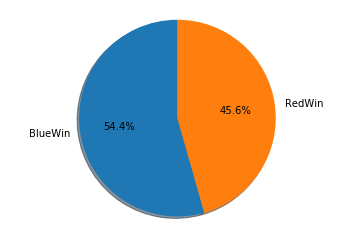

In [12]:
labels = 'BlueWin', 'RedWin'
sizes = [y.value_counts()[1],y.value_counts()[0]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Splitting data into 70% training and 30% test data

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

### Bringing features onto the same scale(Standardization)

In [14]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

# Feature Importance

## Random Forest Selection


accuracy of trainning =  0.8728908886389202
accuracy of testing =  0.7410323709536308
 1) golddiffMiddle                 0.051398
 2) golddiffADC                    0.046385
 3) golddiffSupport                0.041246
 4) golddiffJungle                 0.039767
 5) golddiffTop                    0.038935
 6) rDragons                       0.028696
 7) bKills                         0.028676
 8) rKills                         0.027332
 9) bDragons                       0.023045
10) rTowers                        0.017212
11) bTowers                        0.016512
12) redTeamTag                     0.005891
13) blueJungleChamp                0.005372
14) redMiddleChamp                 0.005371
15) blueTopChamp                   0.005278
16) blueTeamTag                    0.005270
17) redTopChamp                    0.005221
18) blueMiddleChamp                0.005113
19) redJungleChamp                 0.005030
20) redADCChamp                    0.004691
21) blueSupportChamp              

1629) redADC_LokeN                   0.000098
1630) redADC_Stealthix               0.000098
1631) blueSupport_nRated             0.000098
1632) blueJungle_Astarte             0.000098
1633) blueJungle_Epic                0.000098
1634) blueJungle_Danagorn            0.000098
1635) blueJungle_Levi                0.000098
1636) blueSupport_Bodydrop           0.000097
1637) blueMiddle_Gate                0.000097
1638) blueTop_CaliTrlolz8            0.000097
1639) redADC_Emperor                 0.000097
1640) blueSupport_Ben                0.000097
1641) redMiddle_sEiya                0.000096
1642) blueMiddle_Wulala              0.000096
1643) blueJungle_t4nky               0.000096
1644) blueMiddle_aripo               0.000096
1645) blueJungle_Ranger              0.000096
1646) blueADC_Sou                    0.000096
1647) redMiddle_zoiren               0.000095
1648) redSupport_Yellowstar          0.000095
1649) blueJungle_Clearlove           0.000095
1650) blueSupport_Tgun            

2925) redJungle_Muscle               0.000000
2926) redSupport_S HoHotDoG          0.000000
2927) redSupport_SaNTas              0.000000
2928) blueTop_Rippii                 0.000000
2929) redSupport_SaZeD               0.000000
2930) redSupport_Hanjaro             0.000000
2931) blueTop_calitrlolz8            0.000000
2932) blueTop_cackgod                0.000000
2933) redSupport_Lohpally            0.000000
2934) redSupport_Scatz               0.000000
2935) blueTop_Resu                   0.000000
2936) redJungle_Neiman               0.000000
2937) blueTop_Ever Crazy             0.000000
2938) blueTop_ayel                   0.000000
2939) redSupport_Rogu Sama           0.000000
2940) redJungle_Kold                 0.000000
2941) redJungle_Jcain                0.000000
2942) blueTop_i KeNNy u              0.000000
2943) redSupport_SirNukesAlot        0.000000
2944) blueTop_Kazu                   0.000000
2945) redJungle_Morning              0.000000
2946) blueTop_K3nSt3r             

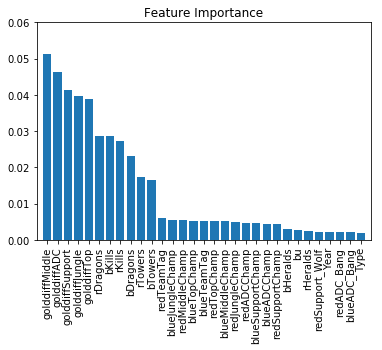

In [15]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = X.columns

forest = RandomForestClassifier(n_estimators=1000, min_samples_split=3,min_samples_leaf =2, class_weight= {1:0.456, 0:0.544},
                                max_features = 'log2',n_jobs=8, criterion='gini',random_state = 1)

forest.fit(X_train, y_train)

print('accuracy of trainning = ' ,forest.score(X_train,y_train))
print('accuracy of testing = ' ,forest.score(X_test,y_test))

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plot_number = 31    
plt.title('Feature Importance')
plt.bar(range(0,plot_number), 
        importances[indices[0:plot_number]],
        align='center')

plt.xticks(range(0,plot_number), 
           feat_labels[indices[0:plot_number]], rotation=90)
plt.xlim([-1, plot_number])
plt.ylim([0.00000,0.06])
plt.savefig('/random_forest_selection.png', dpi=300)
plt.show()

From the result we can see that the first and most important group of features are **gold difference** in different positions. 

And the second important group of features are **accumulated 'Kills','Towers' and 'Dragons'** that one team obtains at 15 minutes. 

And then **champs(heroes) that player use** form the third group of features. 

And finnaly, despite that most players do not account for the result of the game, **top player** actually help predict the game's outcome. ( Wolf was once regarded as the best support in the world, and Band was also top ADC in the world.) 

## PCA Selection

This is used to advoid overfitting and reduce computation.

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([3.39820015e-03, 3.09694271e-03, 2.99061520e-03, ...,
       2.85366143e-38, 1.32559445e-39, 9.08959234e-40])

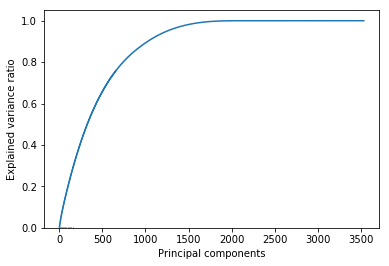

In [17]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.savefig('PCA explained variance ratio.png')
plt.show()

Here I choose only 100 PCA components because of the limited computational power of my computer.

In [18]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Evaluation mertic

## Confusion Matrix


In [19]:
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Metric Output Function for Specific Models

Here I simply combine all the metric in one function, therefore the later codes will look more concise.

In [20]:
def plot_MO(model,X_train,X_test):   
    class_names = ['Bluewin','Bluelose']
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print('accuracy of trainning = ' ,accuracy_score(y_train,y_pred_train))
    print('accuracy of testing = ' ,accuracy_score(y_test,y_pred))
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')
    
    plt.savefig(str(model)[0:10]+'.png')
    plt.show()
    
    prs = precision_score(y_test, y_pred)
    rcs = recall_score(y_test, y_pred)
    f1s = f1_score(y_test, y_pred)
    
    print('PRS =',prs)
    print('RCS =',rcs)
    print('F1 score =',f1s)

## Hyperparameters Optimization

This is a function to find out the optimal hyperparameters. Again, defining a function is for more concise codes.

Moreover, X_train was defined as a input **because I use different data to train different model**, i.e. X_train_pca were 

used to train SVC model and X_train were used to train the others.

Finally, given that we are just predicting the result of a game and the samples are relatively balanced, I just choose 

**'recall'** as the scoring method.

In [21]:
from sklearn.model_selection import GridSearchCV
def hyper_op(model,param_grids,X_train = X_train,cv=2):
    grid_search = GridSearchCV(model, param_grid=param_grids, scoring='recall', cv=cv)
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_params_

# Training Data with Different Models

The standard procedure in this part is:

1. Using **GridSearch** to find out best hyperparameters in a certain range

2. Using the hyperparameters obtained from step 1 to train the model

3. Using **plot_MO** we defined to assess the model

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

param_grids = {'C':[0.01,0.1,0.5,1]}

lr2 = LogisticRegression(penalty='l1',C=0.1,random_state=1)
hyper_op(lr2,param_grids,X_train = X_train)


{'C': 0.1}

accuracy of trainning =  0.8547056617922759
accuracy of testing =  0.7305336832895888


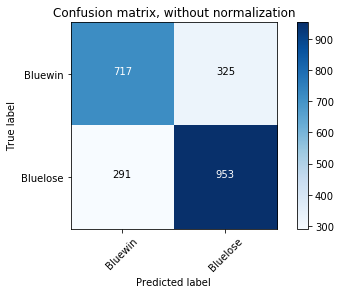

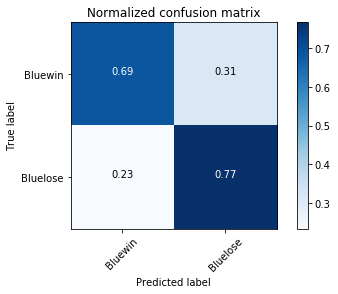

PRS = 0.7456964006259781
RCS = 0.7660771704180064
F1 score = 0.7557494052339413


In [23]:

lr2 = LogisticRegression(penalty='l1',C=0.1,random_state=1)
lr2 = lr2.fit(X_train, y_train)

plot_MO(lr2,X_train,X_test)


### Support Vector Machine

**Note that** I set 'probability = True', because we need to construct a majority proba model later.

In [27]:
from sklearn.svm import SVC

param_grids = {'kernel':['linear','rbf'],
              'C':[1,5,10]}

svm = SVC(kernel='linear', C=1, random_state=1,probability = True)
hyper_op(svm,param_grids,X_train = X_train_pca)

{'C': 1, 'kernel': 'rbf'}

accuracy of trainning =  0.8453318335208099
accuracy of testing =  0.6719160104986877


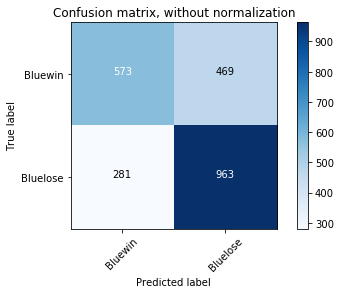

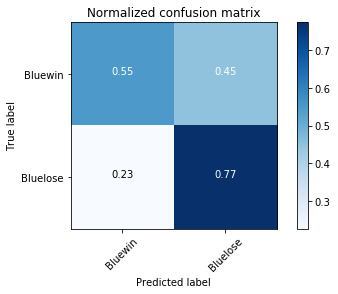

PRS = 0.672486033519553
RCS = 0.7741157556270096
F1 score = 0.7197309417040358


In [32]:

svm = SVC(kernel='rbf', C=1, random_state=1,probability = True)
svm.fit(X_train_pca, y_train)

plot_MO(svm,X_train_pca,X_test_pca)

### XGboost

In [26]:
from xgboost.sklearn import XGBClassifier
param_grids = {
    'max_depth' : [6,9,12],
    'learning_rate': [0.01, 0.02],
    'n_estimators':[50,100],
    'subsample':[0.6,0.8,1]
}
xgb_clf = XGBClassifier(learning_rate=0.01, n_estimators=50 , max_depth=6, min_child_weight=1,
                        subsample=1, colsample_bytree=0.7,
                        reg_alpha = 1, gamma=0.2,objective='binary:logistic',
                        scale_pos_weight=1.2, silent=0, seed=1000)

hyper_op(xgb_clf,param_grids,X_train = X_train)

D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size >

D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size >

D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size >

D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size >

D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size >

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 50, 'subsample': 0.6}

D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\python3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


accuracy of trainning =  0.775403074615673
accuracy of testing =  0.7235345581802275


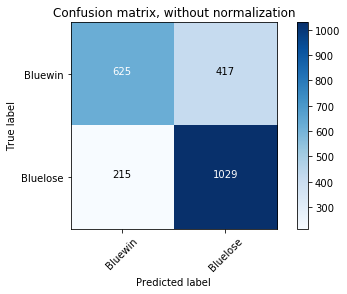

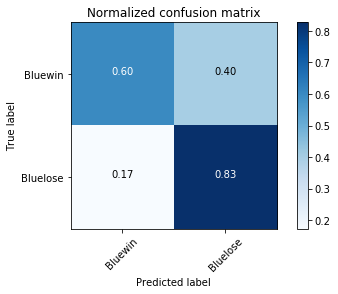

PRS = 0.7116182572614108
RCS = 0.8271704180064309
F1 score = 0.7650557620817844


In [28]:
from xgboost.sklearn import XGBClassifier
xgb_clf = XGBClassifier(learning_rate=0.01, n_estimators=50 , max_depth=6, min_child_weight=1,
                        subsample=0.6, colsample_bytree=0.7,
                        reg_alpha = 1, gamma=0.2,objective='binary:logistic',
                        scale_pos_weight=1.2, silent=0, seed=1000)
xgb_clf.fit(X_train,y_train)

plot_MO(xgb_clf,X_train,X_test)


### Random Forest

**Note that** we have trained the model in 'feature importance' part. And the parameters used above are from here. It's a little bit tricky but basically I did this part first and then changed the parameters above.

In [28]:
param_grids = {
    'min_samples_split': [3,5,10],
    'n_estimators':[100,500,1000],
    'min_samples_leaf':[2,4,6]
}
forest = RandomForestClassifier(n_estimators=500, min_samples_split=5,min_samples_leaf =2, class_weight= {1:0.456, 0:0.544},
                                max_features = 'log2',n_jobs=8, criterion='gini',random_state = 1)
hyper_op(forest,param_grids,X_train = X_train)

{'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 1000}

accuracy of trainning =  0.8728908886389202
accuracy of testing =  0.7410323709536308


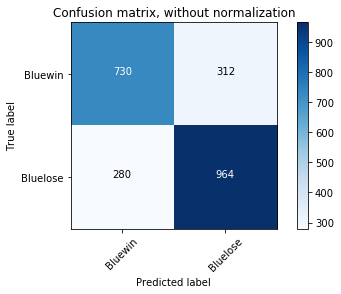

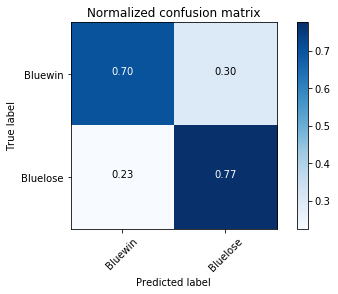

PRS = 0.7554858934169278
RCS = 0.77491961414791
F1 score = 0.7650793650793651


In [29]:
plot_MO(forest,X_train,X_test)

## Majority proba

Since we train the models with different data, the embeded 'Majority Voting' method can not be applied directly.

Therefore we just calculate the weighted probability of different models' prediction to bulid a combined model.

In [30]:
def stack_model(weight_lr = 0.25, weight_svm = 0.25,weight_forest = 0.25, plot=True):
    
    '''
    this part is unnecessary if we have these models trained before
    
    
    lr2 = LogisticRegression(penalty='l1',C=0.1,random_state=1)
    lr2 = lr.fit(X_train, y_train)
    
    svm = SVC(kernel='linear', C=1, random_state=1)
    svm.fit(X_train_pca, y_train)
    
    xgb_clf = XGBClassifier(learning_rate=0.1, n_estimators=50 , max_depth=4, min_child_weight=1,
                        subsample=0.65, colsample_bytree=0.7,
                        reg_alpha = 1, gamma=0.02,objective='binary:logistic',
                        scale_pos_weight=1.2, silent=0, seed=1000)
    xgb_clf.fit(X_train,y_train)
    
    forest = RandomForestClassifier(n_estimators=500, min_samples_split=5,min_samples_leaf =2, class_weight= {1:0.456, 0:0.544},
                                max_features = 'log2',n_jobs=8, criterion='gini',random_state = 1)

    forest.fit(X_train, y_train)
    
    
    '''
    prob_lr = lr2.predict_proba(X_test)[:,1]*weight_lr
    prob_svm = svm.predict_proba(X_test_pca)[:,1]*weight_svm
    prob_forest = forest.predict_proba(X_test)[:,1]*weight_forest
    prob_xgb = xgb_clf.predict_proba(X_test)[:,1]*(1-weight_lr-weight_forest-weight_svm)
    
    y_pred = np.c_[prob_lr, prob_svm,prob_forest, prob_xgb].sum(axis=1).round()
    
    if plot:
        
        class_names = ['Bluewin','Bluelose']

        cnf_matrix = confusion_matrix(y_test, y_pred)
        np.set_printoptions(precision=2)

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=class_names,
                              title='Confusion matrix, without normalization')

        # Plot normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                              title='Normalized confusion matrix')

        plt.show()
    
    f1s = f1_score(y_test,y_pred)
    rcs = recall_score(y_test, y_pred)
    prs = precision_score(y_test, y_pred)
   
    print('PRS =',prs),print('RCS =',rcs),print('F1 score =',f1s)
    
    return f1s, rcs, prs, prob_lr,prob_svm,prob_forest,prob_xgb 

Similarly, we go through different weights to find out the best weights according to some scoring methods.

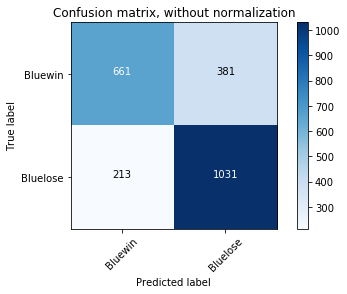

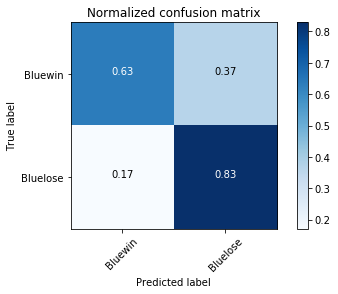

PRS = 0.7301699716713881
RCS = 0.8287781350482315
F1 score = 0.776355421686747


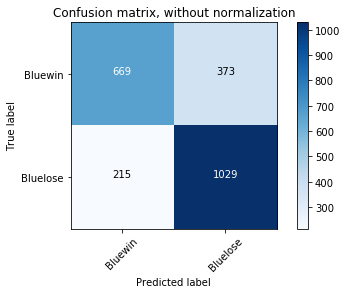

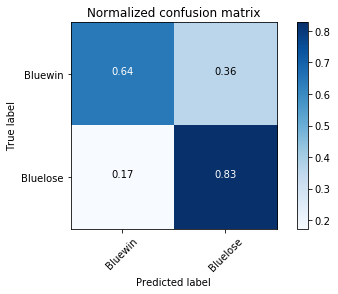

PRS = 0.7339514978601998
RCS = 0.8271704180064309
F1 score = 0.7777777777777779


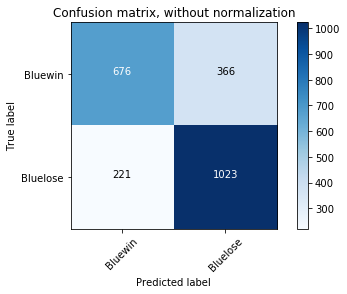

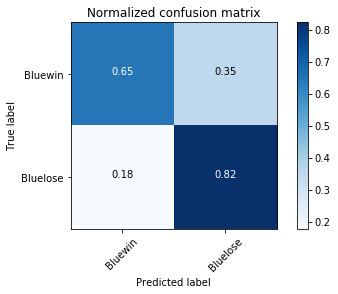

PRS = 0.7365010799136069
RCS = 0.822347266881029
F1 score = 0.777060387390809


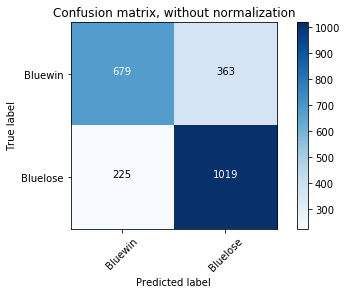

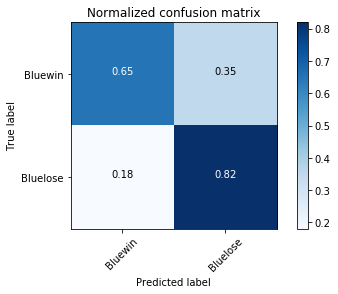

PRS = 0.7373371924746743
RCS = 0.8191318327974276
F1 score = 0.7760853008377759


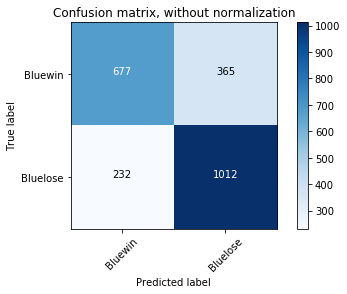

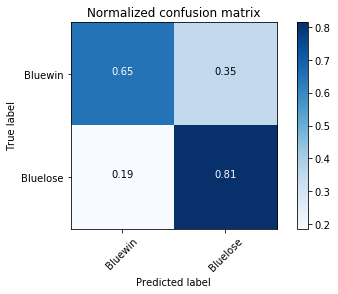

PRS = 0.7349310094408134
RCS = 0.8135048231511254
F1 score = 0.7722243418542541


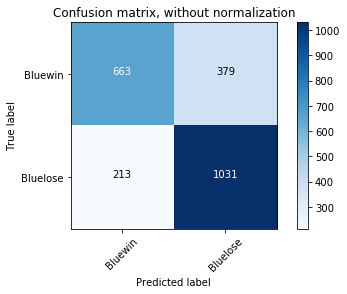

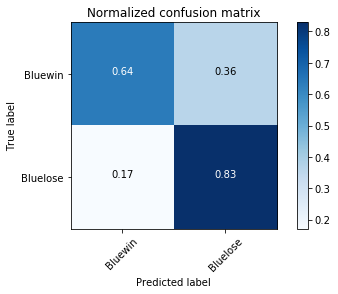

PRS = 0.7312056737588652
RCS = 0.8287781350482315
F1 score = 0.7769404672192917


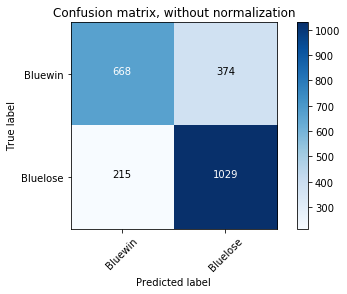

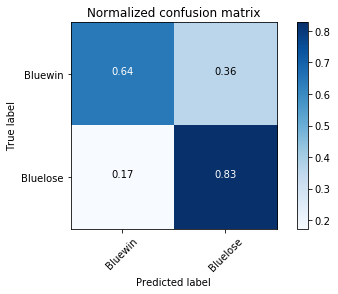

PRS = 0.7334283677833214
RCS = 0.8271704180064309
F1 score = 0.7774839440876464


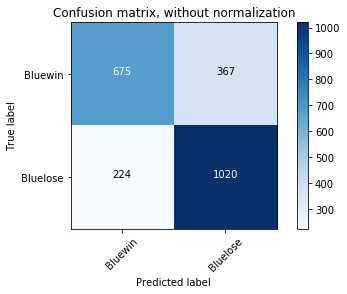

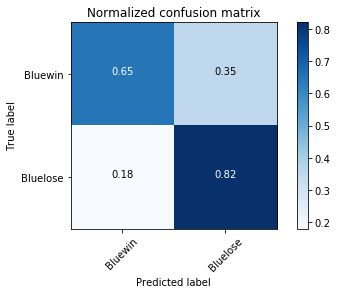

PRS = 0.7354001441961067
RCS = 0.819935691318328
F1 score = 0.7753705815279361


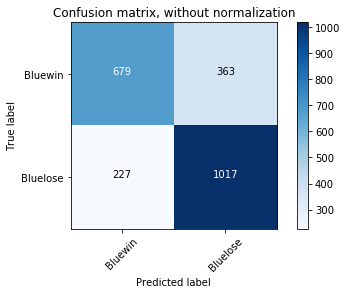

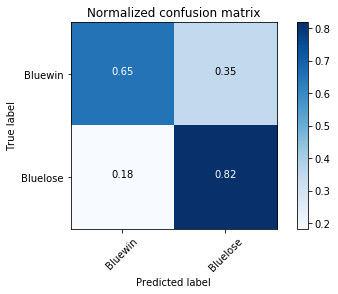

PRS = 0.7369565217391304
RCS = 0.817524115755627
F1 score = 0.7751524390243903


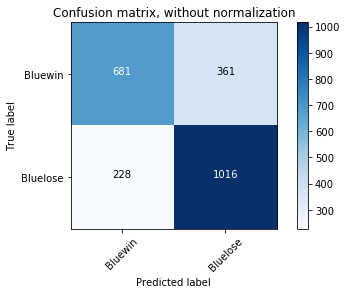

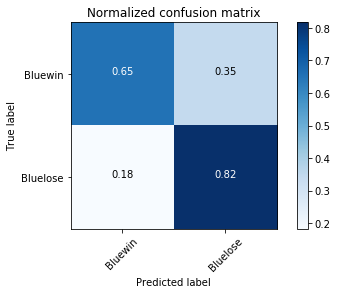

PRS = 0.7378358750907771
RCS = 0.8167202572347267
F1 score = 0.7752766119801603


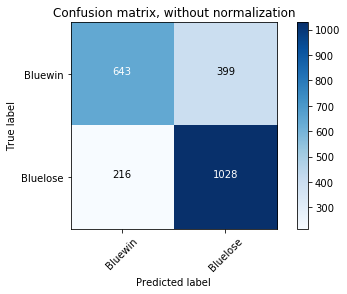

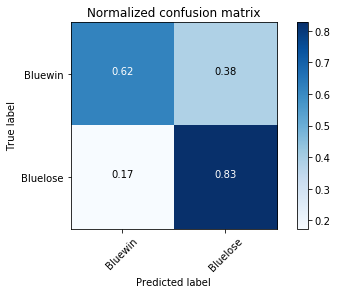

PRS = 0.7203924316748423
RCS = 0.8263665594855305
F1 score = 0.7697491576188693


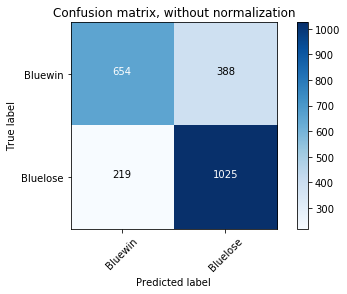

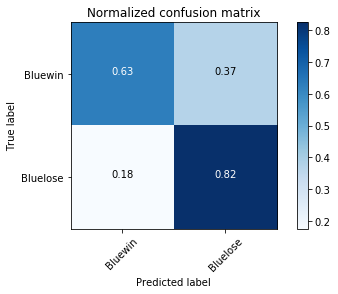

PRS = 0.7254069355980184
RCS = 0.8239549839228296
F1 score = 0.7715468573579224


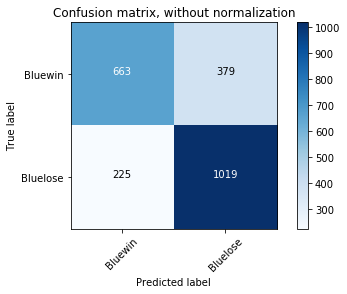

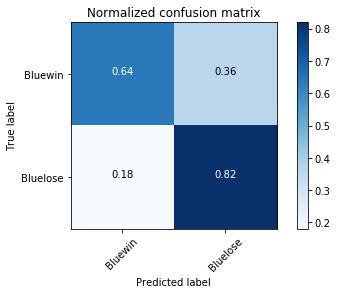

PRS = 0.728898426323319
RCS = 0.8191318327974276
F1 score = 0.7713853141559425


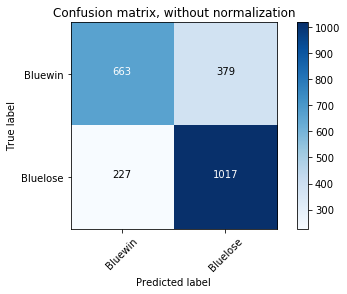

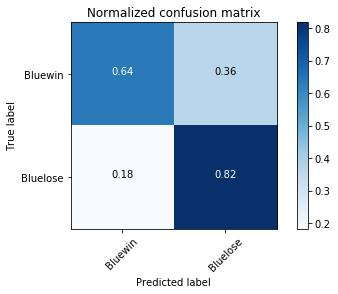

PRS = 0.7285100286532952
RCS = 0.817524115755627
F1 score = 0.7704545454545454


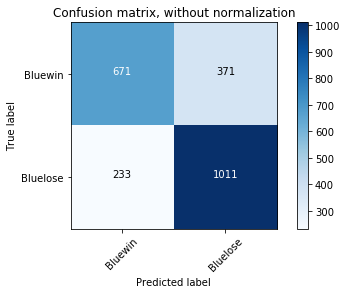

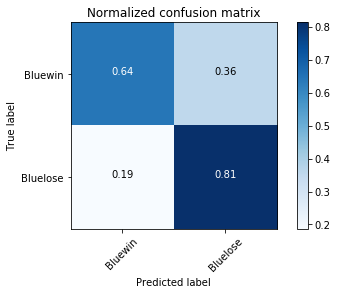

PRS = 0.731548480463097
RCS = 0.8127009646302251
F1 score = 0.7699923838537701


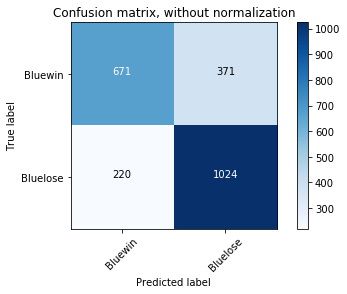

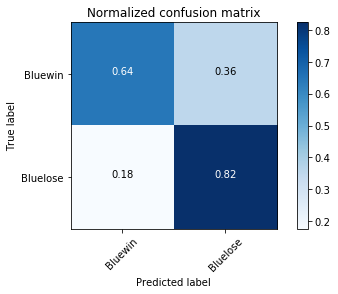

PRS = 0.7340501792114695
RCS = 0.8231511254019293
F1 score = 0.7760515346722243


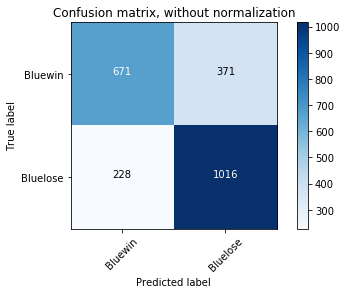

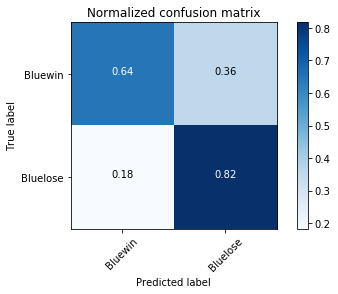

PRS = 0.7325162220620043
RCS = 0.8167202572347267
F1 score = 0.7723299125807678


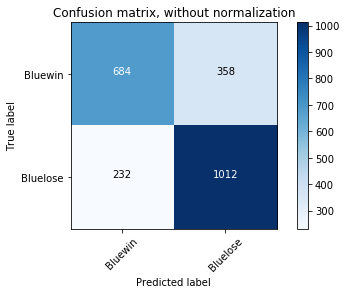

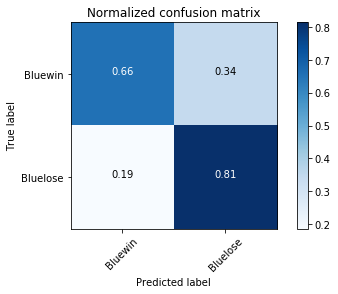

PRS = 0.7386861313868613
RCS = 0.8135048231511254
F1 score = 0.774292272379495


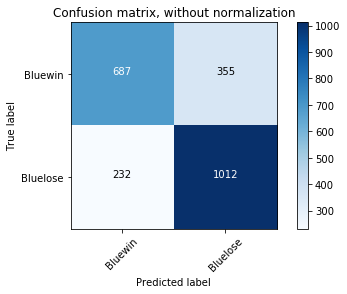

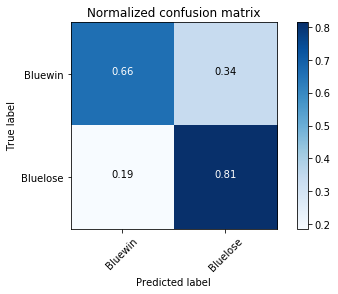

PRS = 0.7403072421360644
RCS = 0.8135048231511254
F1 score = 0.7751819226350057


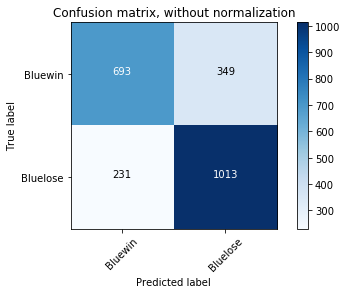

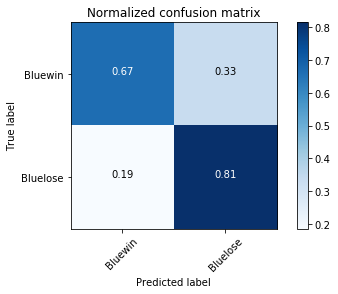

PRS = 0.7437591776798825
RCS = 0.8143086816720257
F1 score = 0.7774366845740599


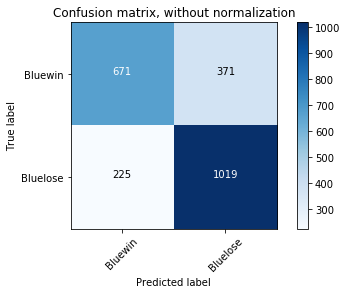

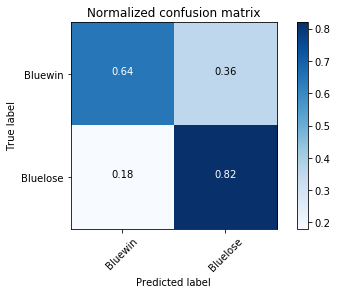

PRS = 0.7330935251798562
RCS = 0.8191318327974276
F1 score = 0.7737281700835231


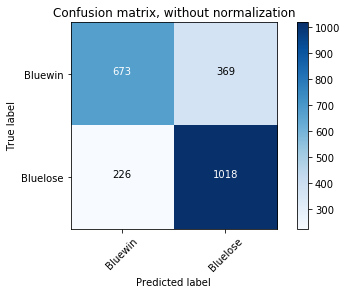

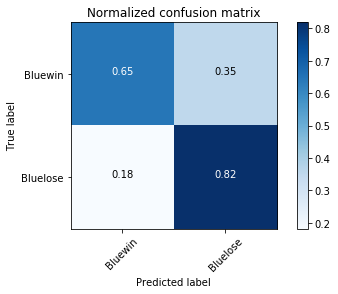

PRS = 0.7339581831290555
RCS = 0.8183279742765274
F1 score = 0.7738502470543519


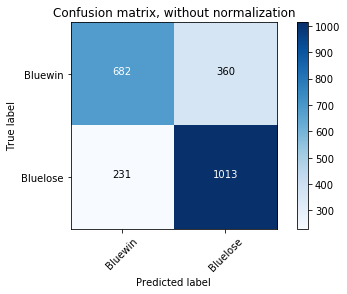

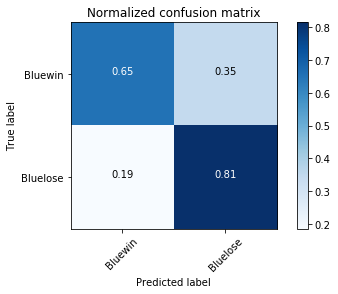

PRS = 0.7378004369992717
RCS = 0.8143086816720257
F1 score = 0.7741688956820787


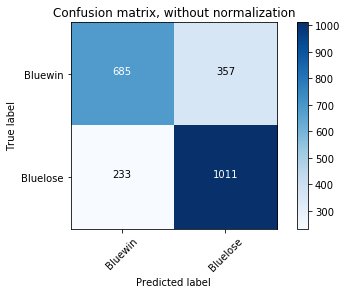

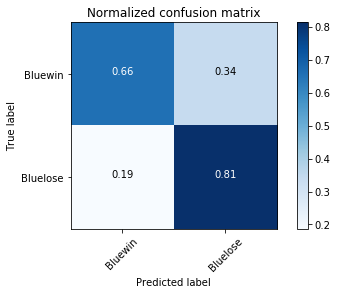

PRS = 0.7390350877192983
RCS = 0.8127009646302251
F1 score = 0.7741194486983155


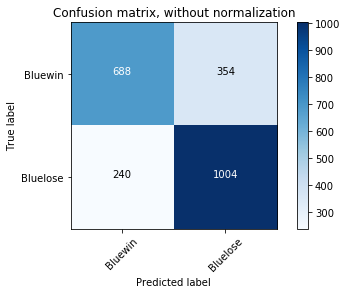

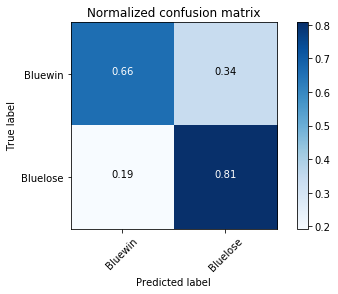

PRS = 0.7393225331369662
RCS = 0.8070739549839229
F1 score = 0.7717140661029978


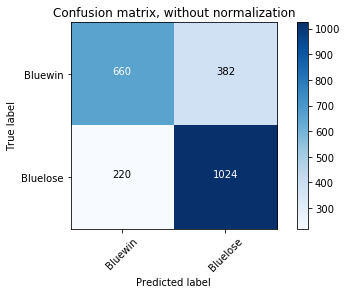

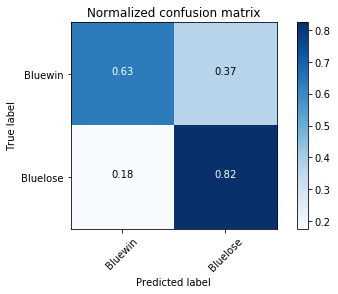

PRS = 0.7283072546230441
RCS = 0.8231511254019293
F1 score = 0.7728301886792452


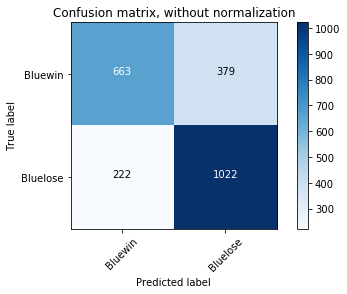

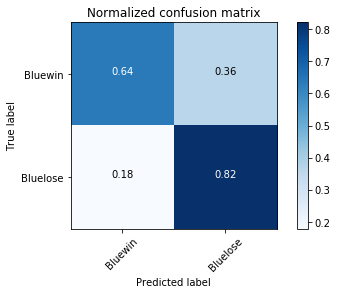

PRS = 0.729478943611706
RCS = 0.8215434083601286
F1 score = 0.7727788279773158


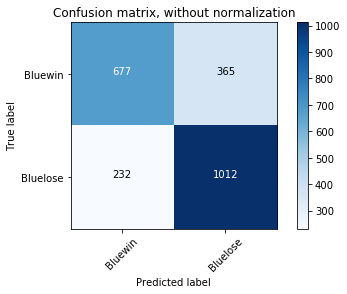

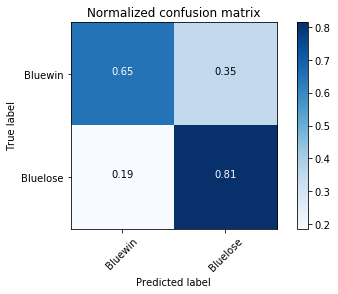

PRS = 0.7349310094408134
RCS = 0.8135048231511254
F1 score = 0.7722243418542541


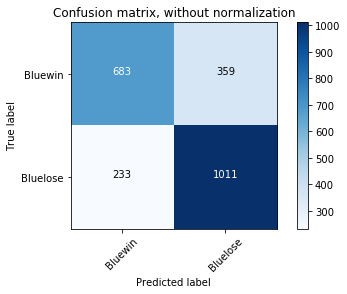

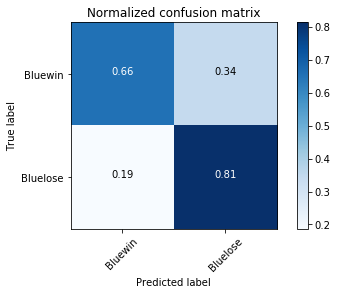

PRS = 0.737956204379562
RCS = 0.8127009646302251
F1 score = 0.7735271614384085


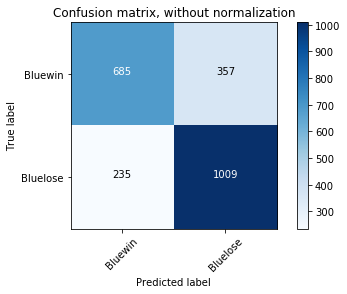

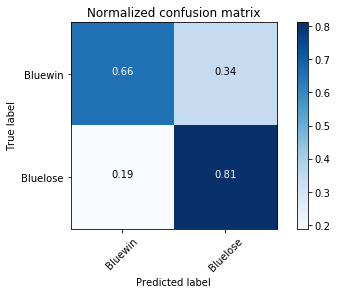

PRS = 0.7386530014641288
RCS = 0.8110932475884244
F1 score = 0.7731800766283525


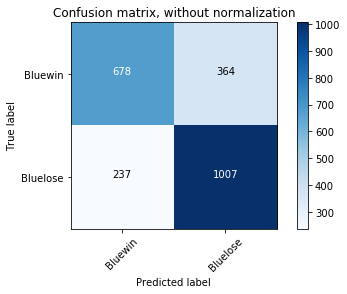

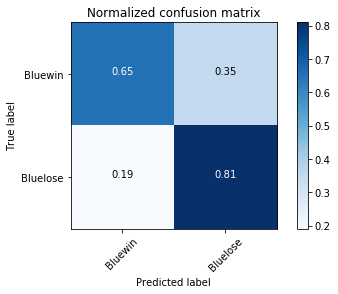

PRS = 0.7345003646973013
RCS = 0.8094855305466238
F1 score = 0.7701720841300191


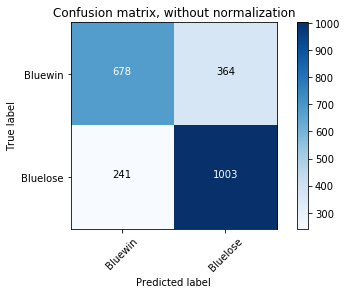

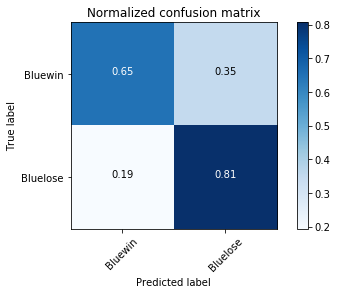

PRS = 0.733723482077542
RCS = 0.8062700964630225
F1 score = 0.7682880122558406


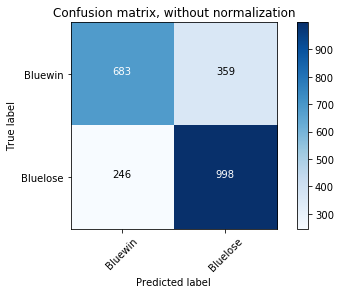

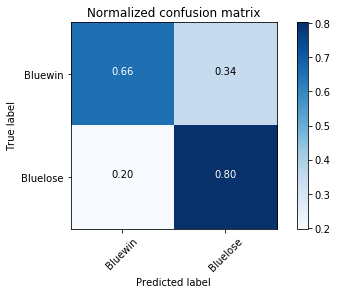

PRS = 0.735445836403832
RCS = 0.8022508038585209
F1 score = 0.7673971549404076


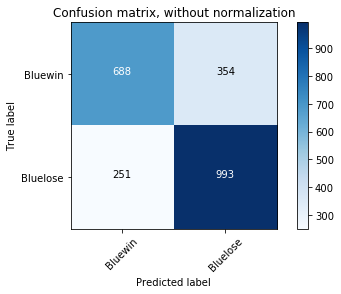

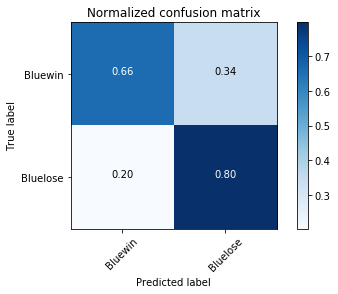

PRS = 0.7371937639198218
RCS = 0.7982315112540193
F1 score = 0.7664994210729448


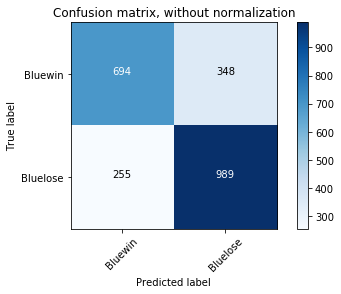

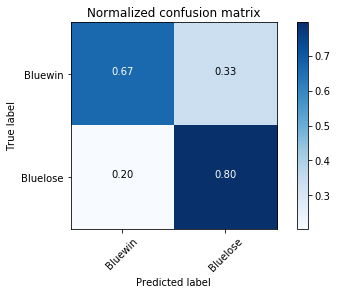

PRS = 0.7397157816005984
RCS = 0.795016077170418
F1 score = 0.7663696241766758


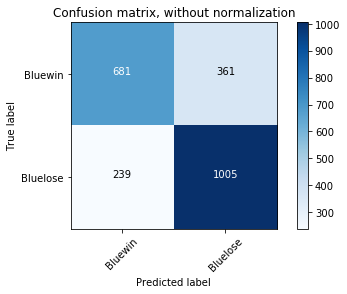

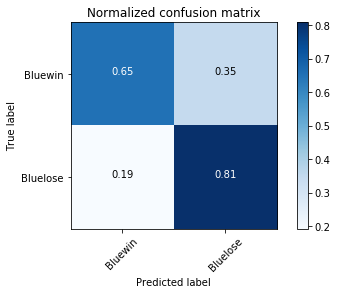

PRS = 0.7357247437774525
RCS = 0.8078778135048231
F1 score = 0.7701149425287356


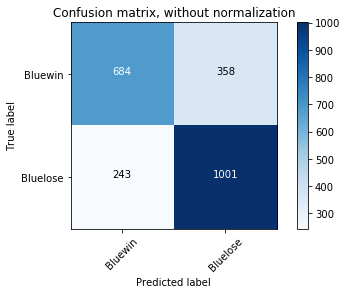

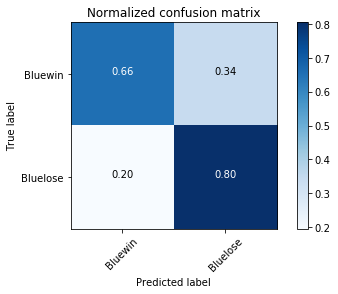

PRS = 0.7365710080941869
RCS = 0.8046623794212219
F1 score = 0.7691125624279678


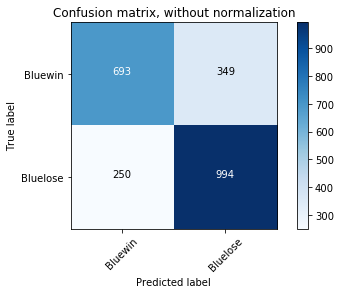

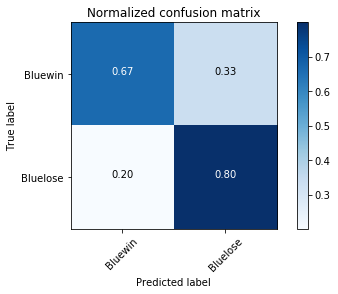

PRS = 0.7401340282948623
RCS = 0.7990353697749196
F1 score = 0.7684576729802861


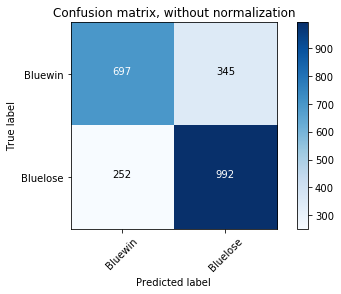

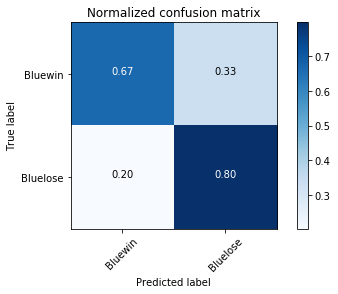

PRS = 0.7419596110695588
RCS = 0.797427652733119
F1 score = 0.7686943045331268


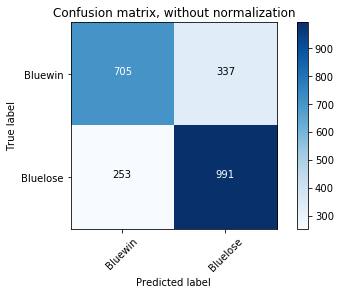

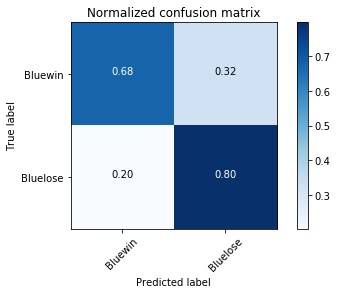

PRS = 0.7462349397590361
RCS = 0.7966237942122186
F1 score = 0.770606531881804


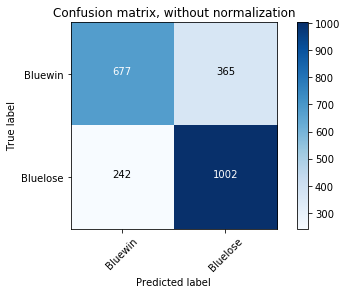

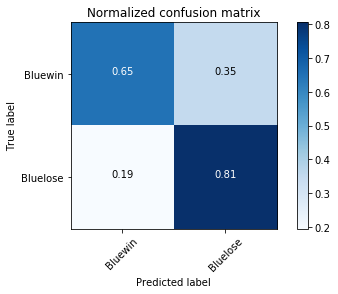

PRS = 0.7329919531821507
RCS = 0.8054662379421221
F1 score = 0.7675220222137112


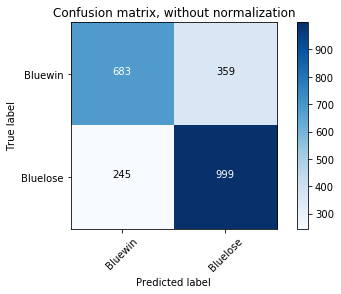

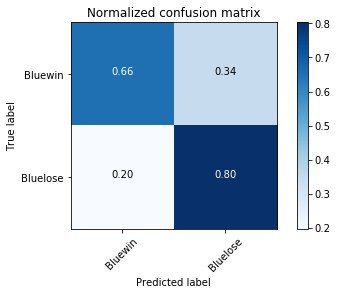

PRS = 0.7356406480117821
RCS = 0.8030546623794212
F1 score = 0.7678708685626442


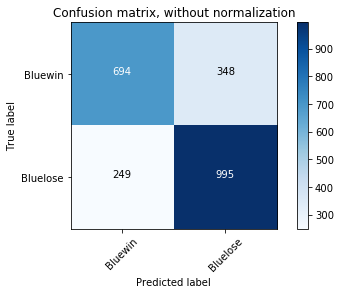

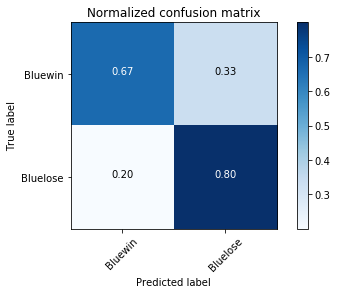

PRS = 0.7408786299329858
RCS = 0.7998392282958199
F1 score = 0.7692307692307692


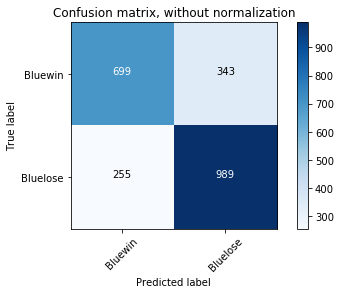

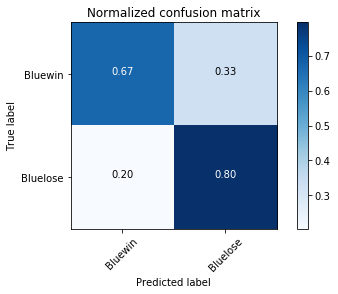

PRS = 0.7424924924924925
RCS = 0.795016077170418
F1 score = 0.7678571428571429


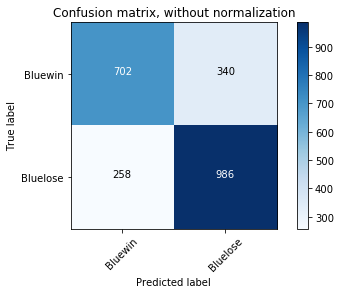

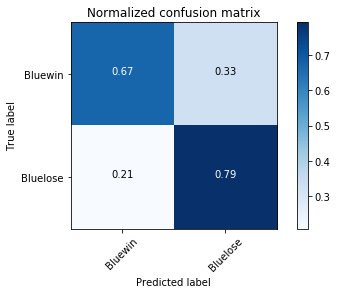

PRS = 0.7435897435897436
RCS = 0.792604501607717
F1 score = 0.7673151750972762


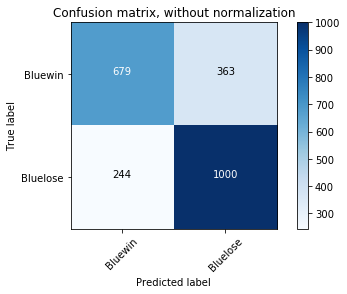

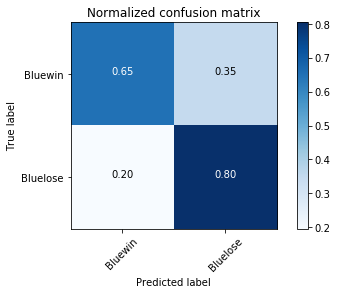

PRS = 0.7336757153338225
RCS = 0.8038585209003215
F1 score = 0.7671653241273494


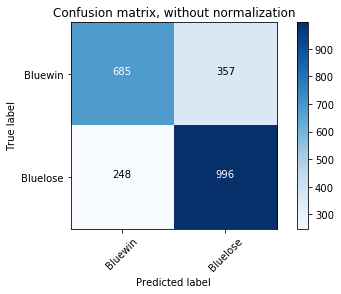

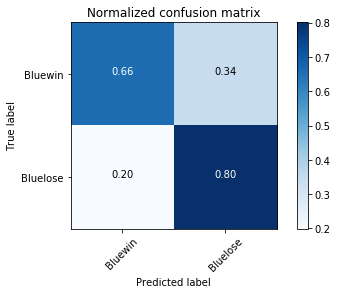

PRS = 0.7361419068736141
RCS = 0.8006430868167203
F1 score = 0.7670388910281094


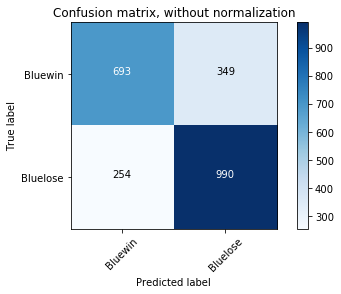

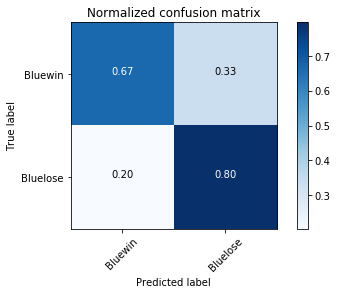

PRS = 0.7393577296489918
RCS = 0.7958199356913184
F1 score = 0.7665505226480837


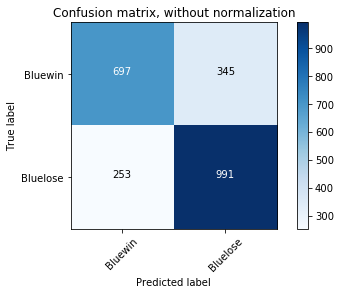

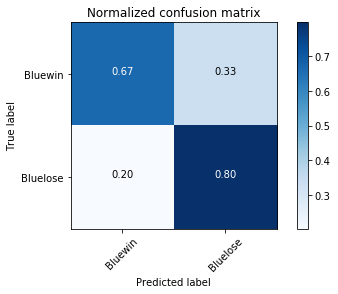

PRS = 0.7417664670658682
RCS = 0.7966237942122186
F1 score = 0.7682170542635658


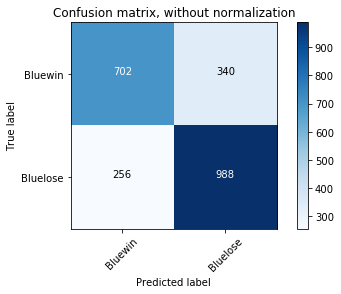

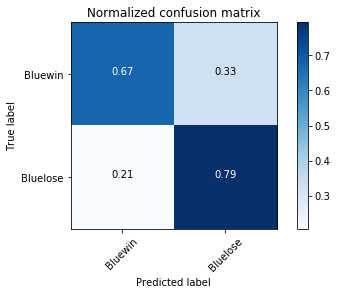

PRS = 0.7439759036144579
RCS = 0.7942122186495176
F1 score = 0.7682737169517885


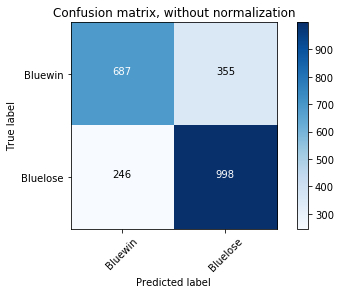

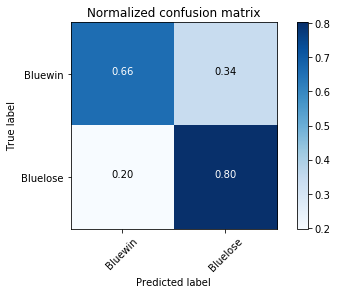

PRS = 0.7376201034737621
RCS = 0.8022508038585209
F1 score = 0.7685791297651137


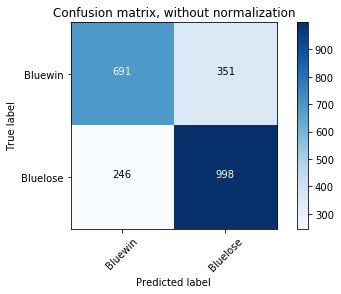

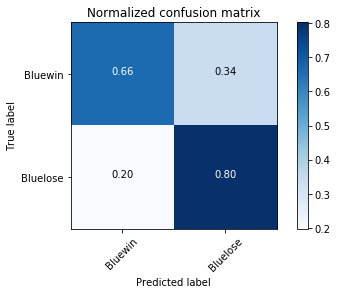

PRS = 0.7398072646404744
RCS = 0.8022508038585209
F1 score = 0.7697647512533744


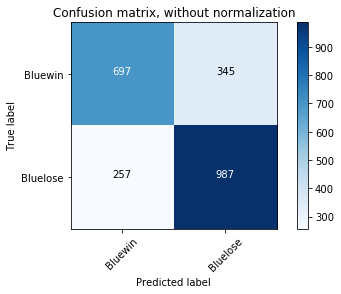

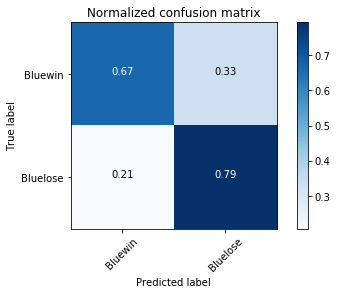

PRS = 0.740990990990991
RCS = 0.7934083601286174
F1 score = 0.7663043478260869


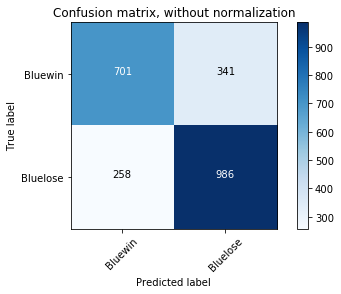

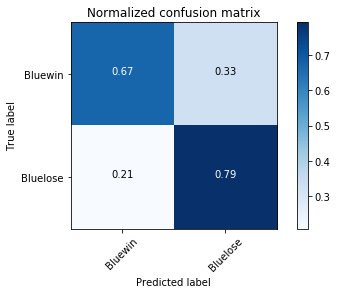

PRS = 0.7430293896006028
RCS = 0.792604501607717
F1 score = 0.7670167250097237


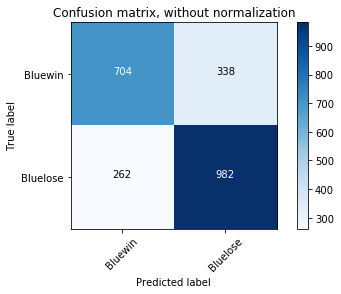

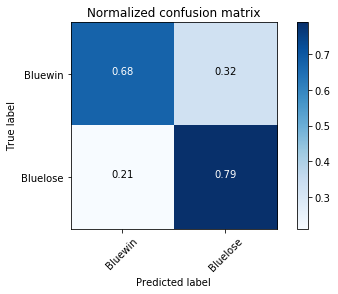

PRS = 0.7439393939393939
RCS = 0.7893890675241158
F1 score = 0.765990639625585


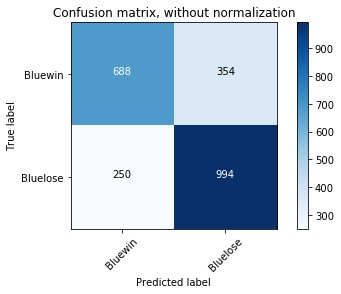

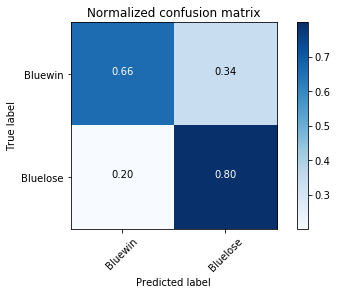

PRS = 0.7373887240356083
RCS = 0.7990353697749196
F1 score = 0.7669753086419753


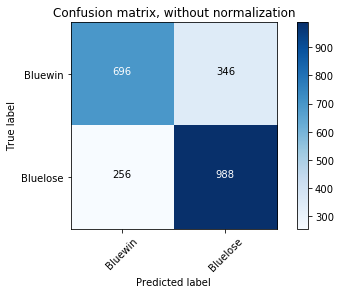

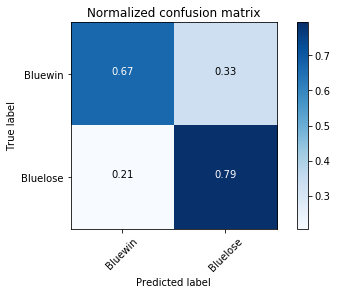

PRS = 0.7406296851574213
RCS = 0.7942122186495176
F1 score = 0.7664856477889838


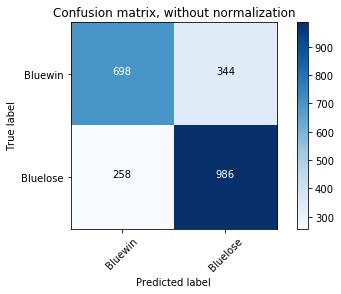

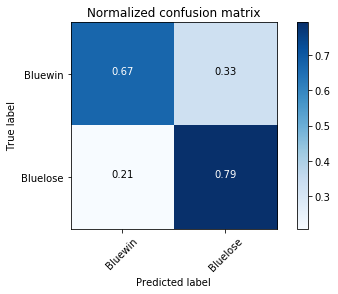

PRS = 0.7413533834586467
RCS = 0.792604501607717
F1 score = 0.7661227661227661


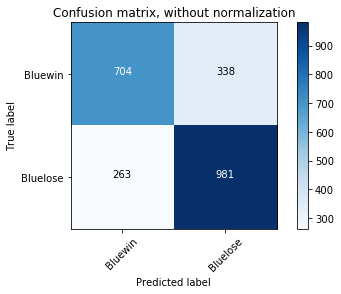

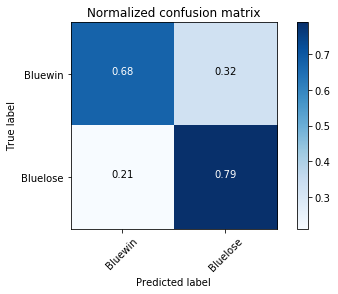

PRS = 0.7437452615617892
RCS = 0.7885852090032154
F1 score = 0.7655091689426453


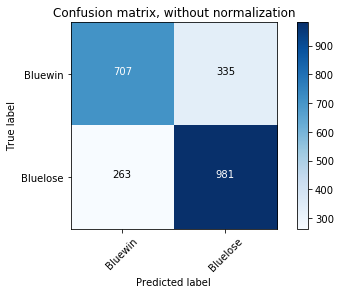

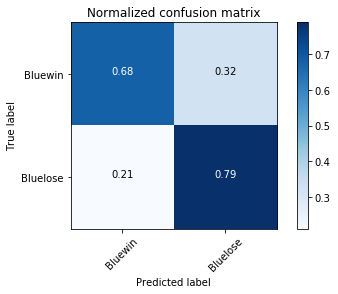

PRS = 0.7454407294832827
RCS = 0.7885852090032154
F1 score = 0.76640625


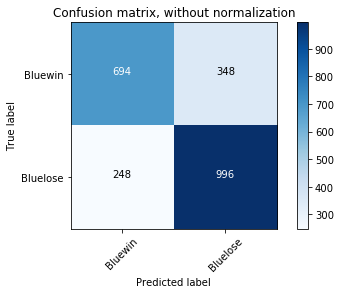

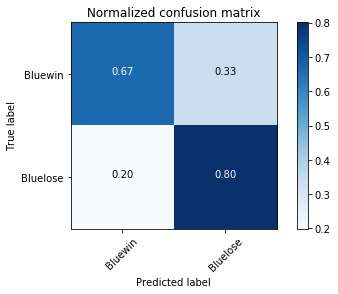

PRS = 0.7410714285714286
RCS = 0.8006430868167203
F1 score = 0.7697063369397219


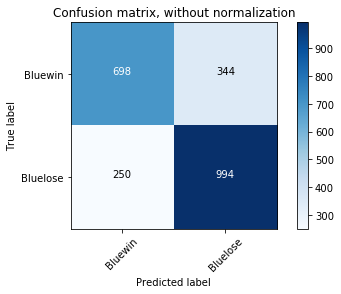

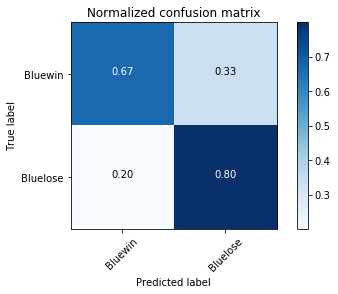

PRS = 0.7428998505231689
RCS = 0.7990353697749196
F1 score = 0.7699457784663052


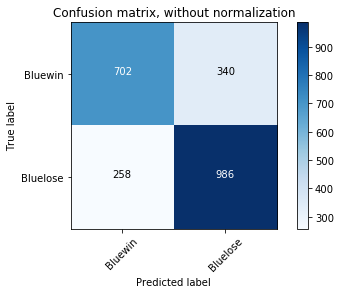

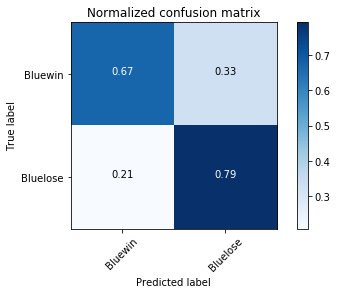

PRS = 0.7435897435897436
RCS = 0.792604501607717
F1 score = 0.7673151750972762


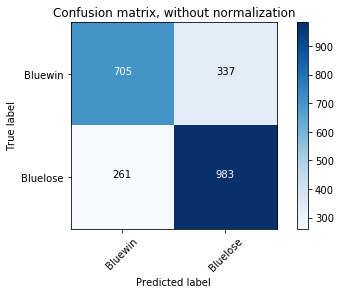

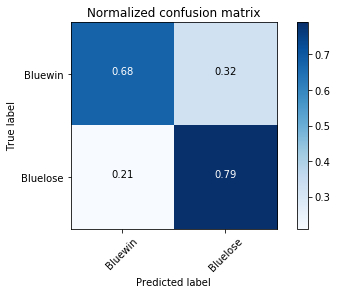

PRS = 0.7446969696969697
RCS = 0.7901929260450161
F1 score = 0.7667706708268331


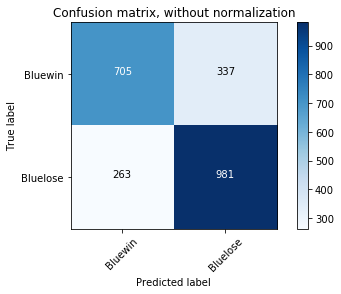

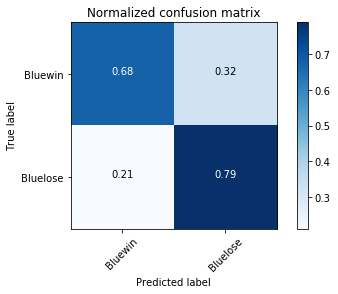

PRS = 0.7443095599393019
RCS = 0.7885852090032154
F1 score = 0.7658079625292739


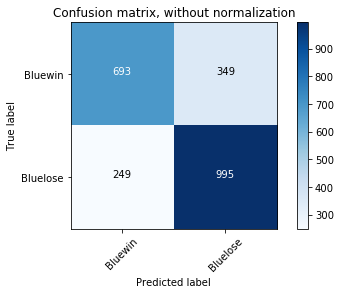

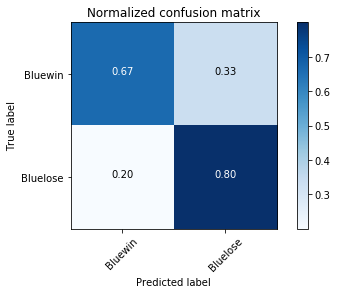

PRS = 0.7403273809523809
RCS = 0.7998392282958199
F1 score = 0.7689335394126737


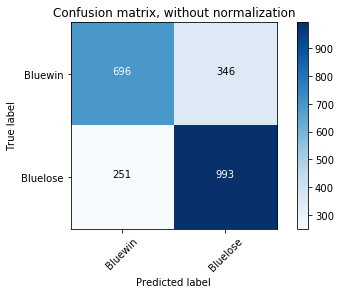

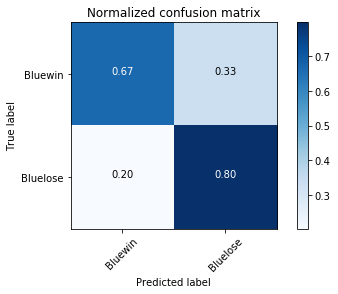

PRS = 0.7415982076176251
RCS = 0.7982315112540193
F1 score = 0.7688734030197445


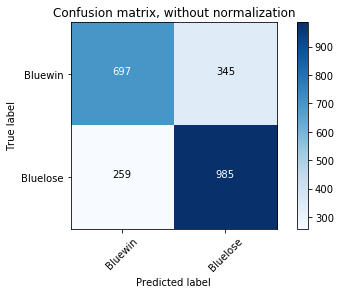

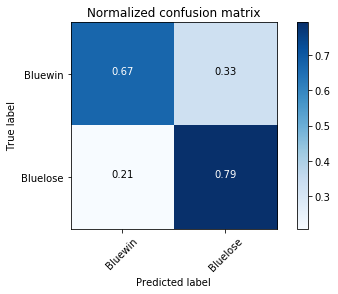

PRS = 0.7406015037593985
RCS = 0.7918006430868167
F1 score = 0.7653457653457654


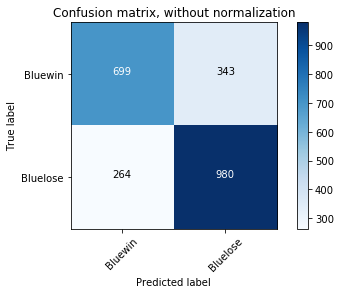

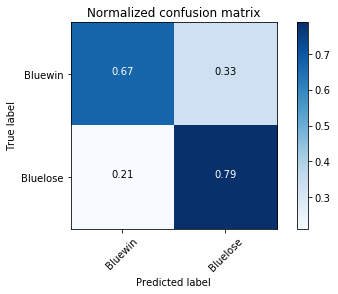

PRS = 0.7407407407407407
RCS = 0.7877813504823151
F1 score = 0.7635372029606544


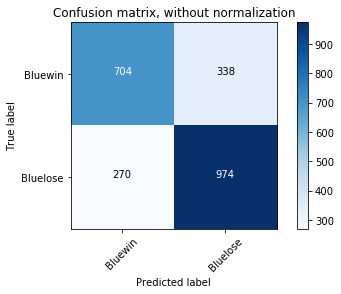

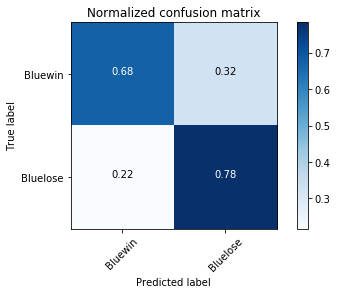

PRS = 0.7423780487804879
RCS = 0.7829581993569131
F1 score = 0.7621283255086071


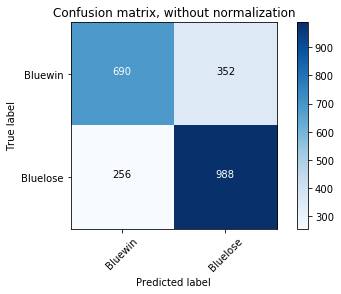

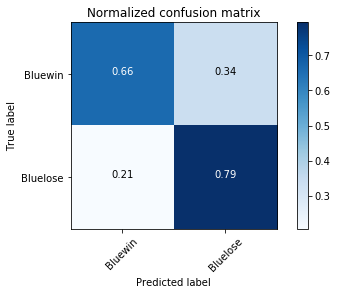

PRS = 0.7373134328358208
RCS = 0.7942122186495176
F1 score = 0.7647058823529411


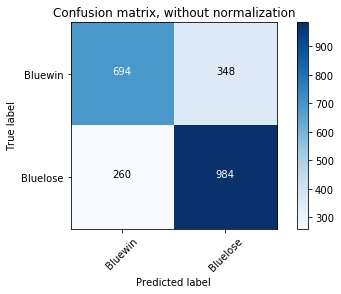

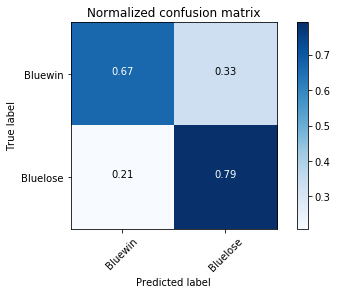

PRS = 0.7387387387387387
RCS = 0.7909967845659164
F1 score = 0.7639751552795031


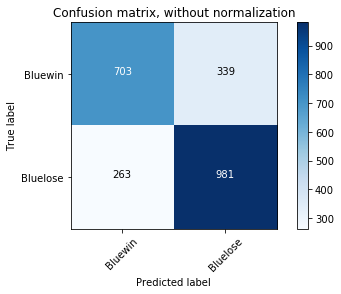

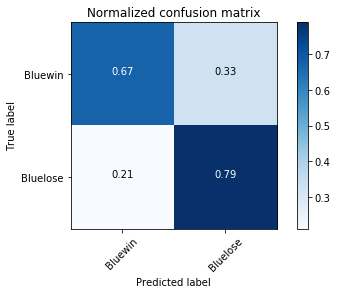

PRS = 0.7431818181818182
RCS = 0.7885852090032154
F1 score = 0.7652106084243369


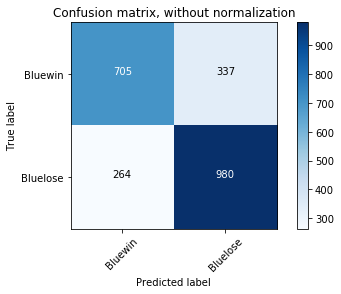

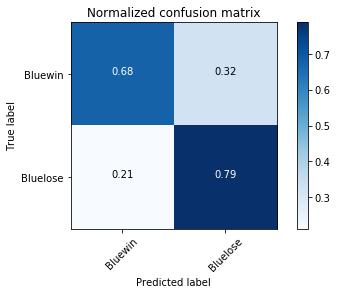

PRS = 0.7441154138192863
RCS = 0.7877813504823151
F1 score = 0.7653260445138619


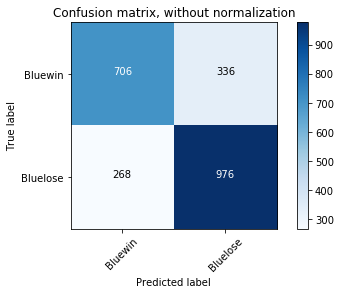

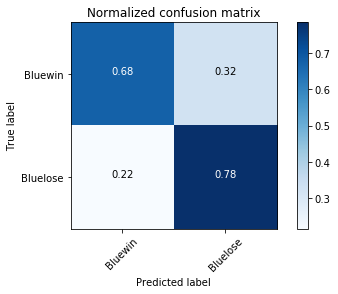

PRS = 0.7439024390243902
RCS = 0.7845659163987139
F1 score = 0.7636932707355243


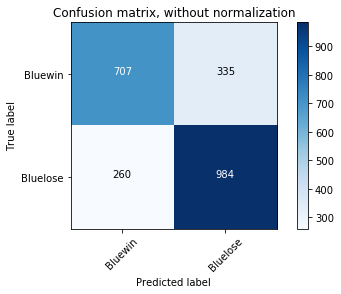

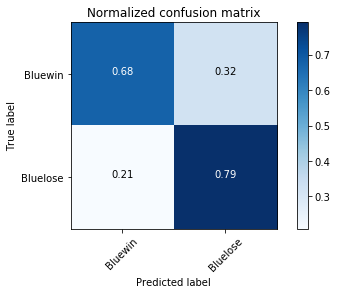

PRS = 0.7460197119029568
RCS = 0.7909967845659164
F1 score = 0.7678501755754975


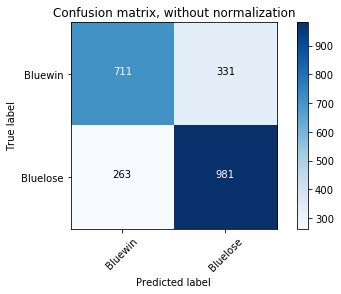

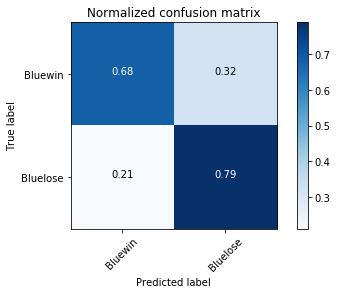

PRS = 0.7477134146341463
RCS = 0.7885852090032154
F1 score = 0.7676056338028169


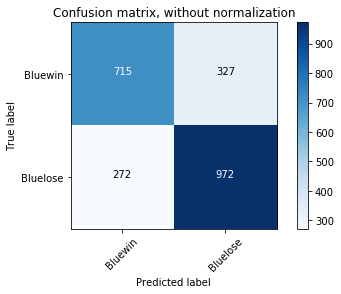

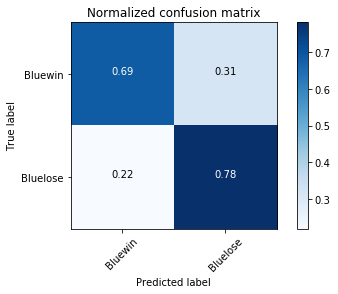

PRS = 0.7482678983833718
RCS = 0.7813504823151125
F1 score = 0.7644514353126228


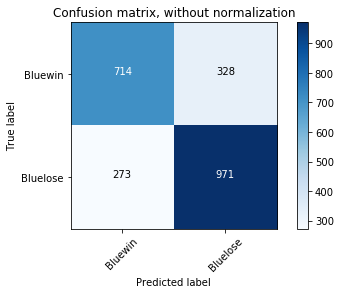

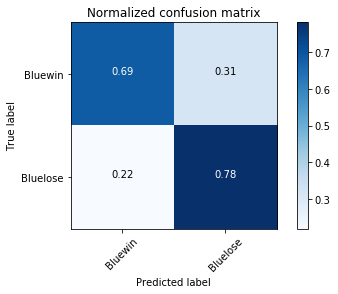

PRS = 0.7474980754426482
RCS = 0.7805466237942122
F1 score = 0.7636649626425482


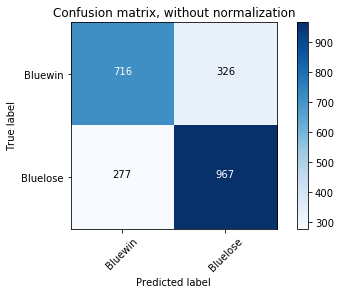

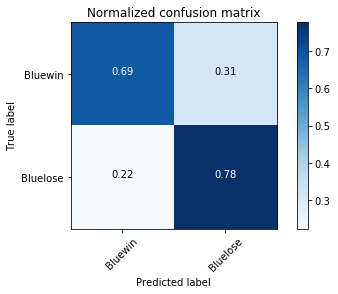

PRS = 0.7478731631863882
RCS = 0.7773311897106109
F1 score = 0.7623176980685848


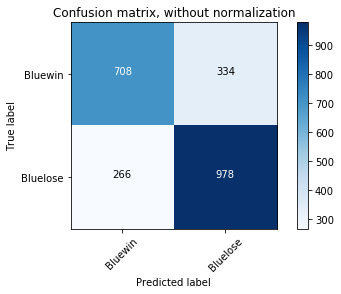

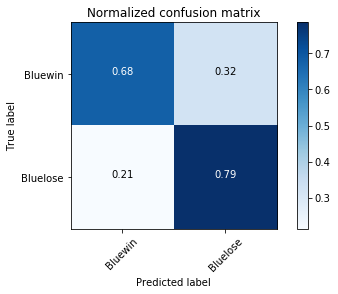

PRS = 0.7454268292682927
RCS = 0.7861736334405145
F1 score = 0.7652582159624414


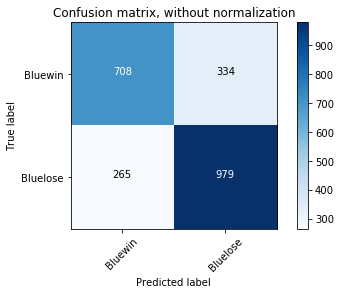

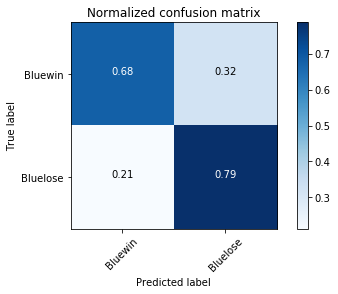

PRS = 0.7456207159177456
RCS = 0.7869774919614148
F1 score = 0.765741102854908


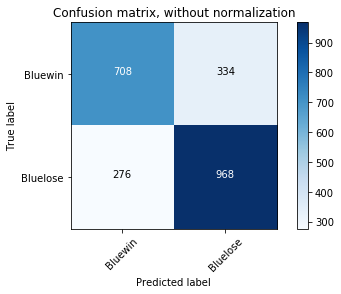

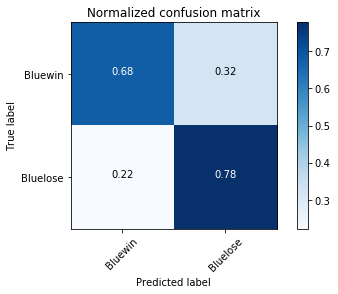

PRS = 0.7434715821812596
RCS = 0.7781350482315113
F1 score = 0.760408483896308


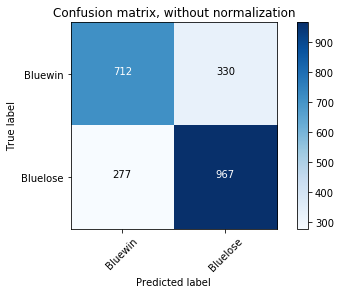

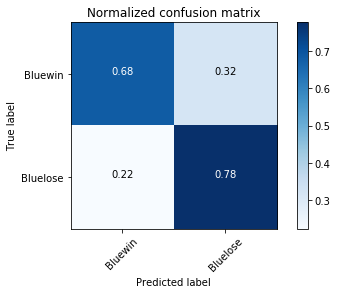

PRS = 0.7455666923670008
RCS = 0.7773311897106109
F1 score = 0.7611176702085792


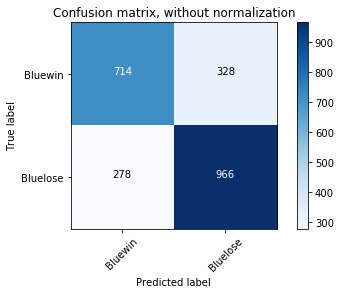

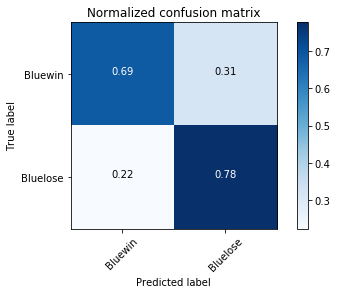

PRS = 0.7465224111282844
RCS = 0.7765273311897106
F1 score = 0.7612293144208038


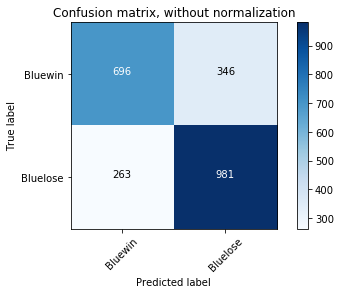

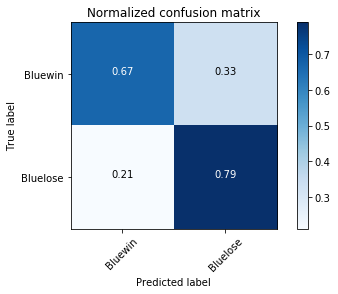

PRS = 0.7392614920874152
RCS = 0.7885852090032154
F1 score = 0.7631271878646441


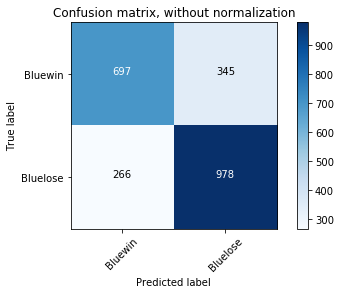

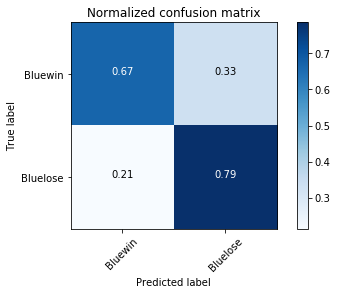

PRS = 0.7392290249433107
RCS = 0.7861736334405145
F1 score = 0.7619789637709389


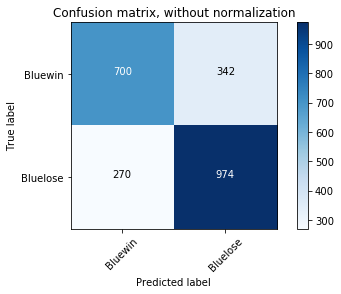

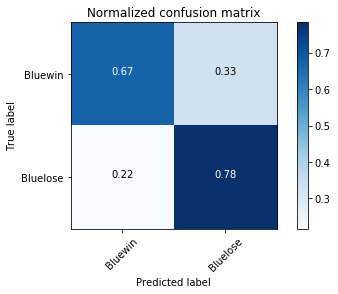

PRS = 0.7401215805471124
RCS = 0.7829581993569131
F1 score = 0.7609375


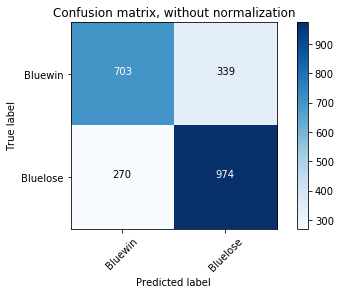

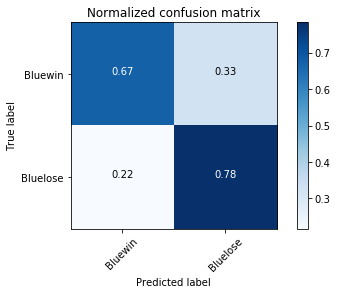

PRS = 0.7418126428027418
RCS = 0.7829581993569131
F1 score = 0.7618302698474775


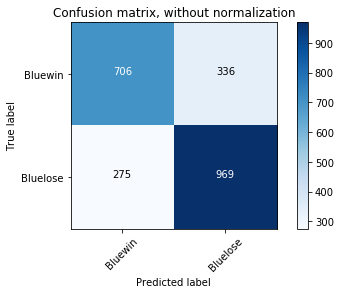

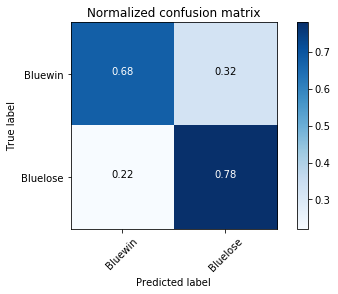

PRS = 0.7425287356321839
RCS = 0.7789389067524116
F1 score = 0.7602981561396627


In [33]:
f1s_list=[]
rcs_list=[]
prs_list=[]
for w1 in [0.05,0.1,0.2,0.25,0.3,0.4]:
    for w2 in [0.05,0.1,0.2]:
        for w3 in [0.05,0.1,0.2,0.25,0.3]:
            
            f1s_one, rcs_one, prs_one = stack_model(w1, w2, w3)[0:3]
            f1s_list.append(f1s_one)
            rcs_list.append(rcs_one)
            prs_list.append(prs_one)
            # print(w1, w2, w3, f1s_one, rcs_one, prs_one)


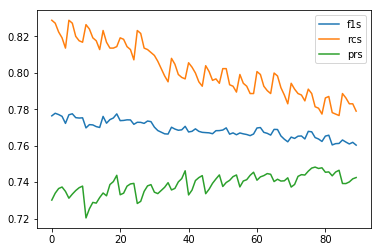

In [34]:
plt.plot(f1s_list,label='f1s')
plt.plot(rcs_list,label='rcs')
plt.plot(prs_list,label='prs')
plt.legend(loc='best')
plt.savefig('f1s with different weights.png')
plt.show()

## Evaluating (AUC)

Here I just plot the ROC_AUC for all the models.

The fact that combined model performs worse than Logistic Regression, Random Forest and XGboost probabily because of the bad 

performance of SVM model. And that could be the result of less dimensional data.

PRS = 0.7301699716713881
RCS = 0.8287781350482315
F1 score = 0.776355421686747


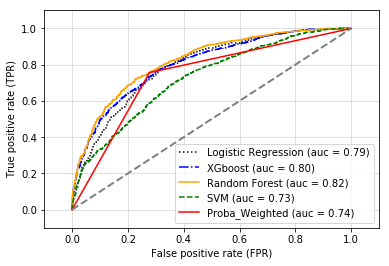

In [40]:
prob_lr,prob_svm,prob_forest,prob_xgb  = stack_model(0.05,0.05,0.05,plot=False)[3:]
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

all_clf = [lr2, xgb_clf,forest]
label =['Logistic Regression','XGboost','Random Forest']

colors = ['black', 'blue','orange']
linestyles = [':', '-.','steps']
for clf, label, clr, ls \
        in zip(all_clf,
               label, colors, linestyles):

    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))
y_pred = svm.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=y_pred)
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr,
         color='green',
         linestyle='--',
         label='%s (auc = %0.2f)' % ('SVM', roc_auc))

y_pred = np.c_[prob_lr, prob_svm, prob_xgb].sum(axis=1).round()
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=y_pred)
roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr,
         color='red',
         linestyle='-',
         label='%s (auc = %0.2f)' % ('Proba_Weighted', roc_auc))

    
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


plt.savefig('ROC_AUC.png', dpi=300)
plt.show()
